## **Univariate Linear Regression**
Meaning that the number of features is 1

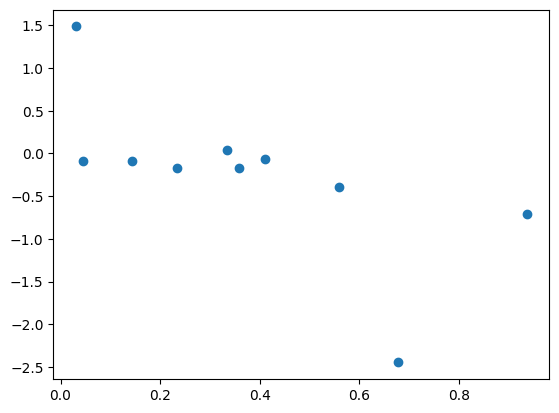

In [176]:
import numpy as np
import matplotlib.pyplot as plt

m = 10

# creating some random data points
x_train = sorted(np.random.rand(m, 1))
y_train = [np.random.randn() for _ in range(len(x_train))]

plt.scatter(x_train, y_train)

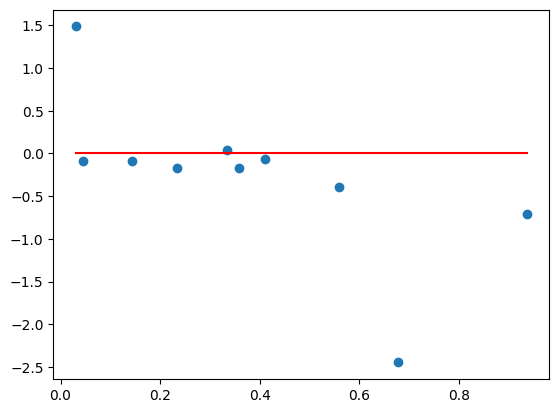

In [177]:
# initialize the functions
w_t = 0
b_t = 0

# initialized function predictions
y_hat = [(w_t * x_train[i] + b_t) for i in range(len(x_train))]

# plot the initialization
plt.scatter(x_train, y_train)
plt.plot(x_train, y_hat, c="r")

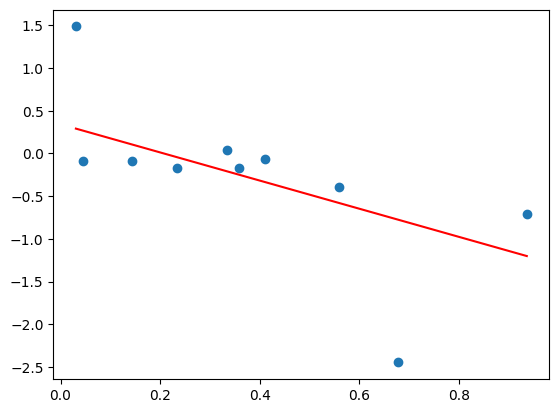

In [180]:
# learning rate
alpha = 0.1

# initialize the functions
w_t = 0
b_t = 0

costs = []

# apply the learning algorithm and update parameters
for _ in range(200):

    # compute cost function and store it
    cost = np.sum([(w_t * x_train[i] + b_t - y_train[i])**2 for i in range(len(x_train))]) / (2 * len(x_train))
    costs.append(cost)

    # derivatives implementation
    dcfdw = sum([(w_t * x_train[i]**2 + b_t * x_train[i] - x_train[i] * y_train[i]) for i in range(len(x_train))]) / len(x_train)
    dcfdb = sum([(b_t + w_t * x_train[i] - y_train[i]) for i in range(len(x_train))]) / len(x_train)

    # update parameters
    w_t = w_t - alpha * dcfdw
    b_t = b_t - alpha * dcfdb

# plot the updated function
y_hat = [(w_t*x_train[i] + b_t) for i in range(len(x_train))]

# plot the initialization
plt.scatter(x_train, y_train)
plt.plot(x_train, y_hat, c="r")

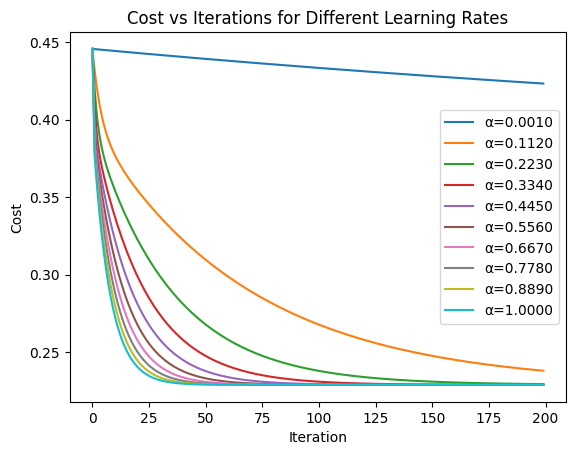

In [181]:
# to find a faster learning rate i try many of them
alphas = np.linspace(0.001, 1, 10)

for alpha in alphas:
    costs = []
    w_t = 0
    b_t = 0
    
    for _ in range(200):
        cost = np.sum([(w_t * x_train[i] + b_t - y_train[i])**2 for i in range(len(x_train))]) / (2 * len(x_train))
        costs.append(cost)
        
        dcfdw = sum([(w_t * x_train[i]**2 + b_t * x_train[i] - x_train[i] * y_train[i]) for i in range(len(x_train))]) / len(x_train)
        dcfdb = sum([(b_t + w_t * x_train[i] - y_train[i]) for i in range(len(x_train))]) / len(x_train)
        
        w_t = w_t - alpha * dcfdw
        b_t = b_t - alpha * dcfdb
    
    plt.plot(costs, label=f'α={alpha:.4f}')  # Add label here

plt.legend()
plt.xlabel('Iteration')
plt.ylabel('Cost')
plt.title('Cost vs Iterations for Different Learning Rates')
plt.show()

## **Multiple Linear Regression**
Meaning that the number of features is > 1. Here is where vectorization shines (need to use numpy)

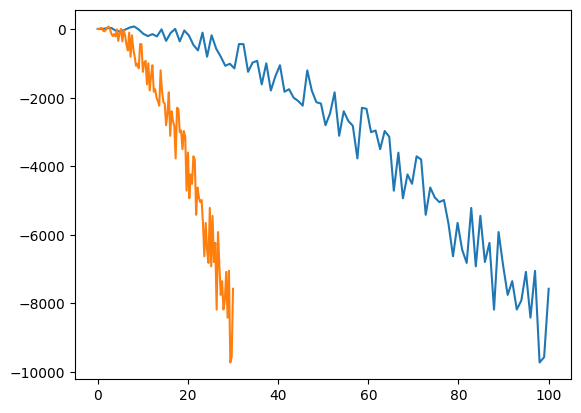

In [132]:
import numpy as np
import matplotlib.pyplot as plt

# creating first a function with some noise inside
x1s = np.linspace(0, 100, 100)
x2s = np.linspace(0, 30, 100)

ys = []

for x1, x2 in zip(x1s, x2s):
        epsilon = (np.random.random() - 0.5)*10
        y = -x1**2 + x2**2 - 3*x1*epsilon + 5*x2 + 5
        ys.append(y)

plt.plot(x1s, ys)
plt.plot(x2s, ys)

In [98]:
alpha = 0.00001

w1 = 0
w2 = 0
b = 0

costs = []

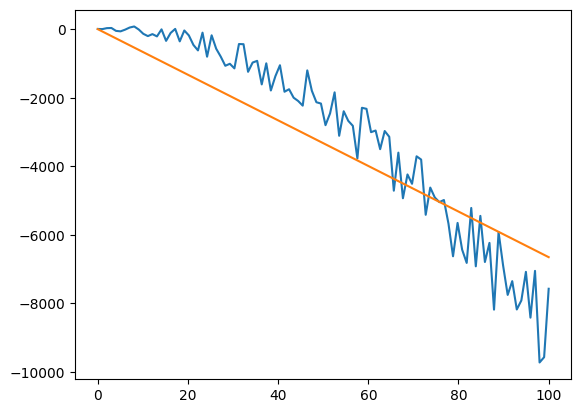

In [166]:
for _ in range(5):
    # Cost function
    cost = np.sum((w1 * x1s + w2 * x2s + b - ys)**2) / (2 * len(x1s))
    costs.append(cost)
    
    # gradients computation
    error = w1 * x1s + w2 * x2s + b - ys
    dfdx1 = np.sum(error * x1s) / len(x1s)
    dfdx2 = np.sum(error * x2s) / len(x1s)
    dfdb = np.sum(error) / len(x1s)
    
    # Update parameters
    w1 = w1 - alpha * dfdx1
    w2 = w2 - alpha * dfdx2
    b = b - alpha * dfdb

# Predictions
ys_hat = w1 * x1s + w2 * x2s + b

plt.plot(x1s, ys)
plt.plot(x1s, ys_hat)

## **Linear Regression using Scikit-Learn**
Higher level library for ML. First using SDGR Regression model and then Linear Regression one. Also computing training times

xs shape: (100, 1)
ys shape: (100,)


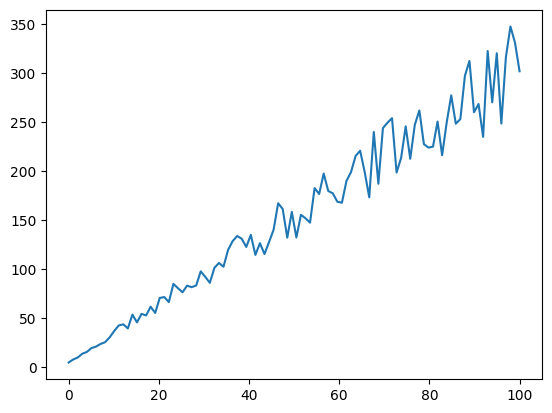

In [45]:
import numpy as np
import matplotlib.pyplot as plt

# creating first a function with some noise inside
xs = np.linspace(0, 100, 100)
xs = xs.reshape(-1, 1)

ys = []

for x in xs:
        epsilon = (np.random.random() - 0.5)
        y = (3 + epsilon) * x + 5 # adding some noise to y = 3x + 5
        ys.append(y)

ys = np.array(ys).reshape(100, )

print(f"xs shape: {xs.shape}")
print(f"ys shape: {ys.shape}")
display(plt.plot(xs, ys))

training time: 1.1871 milliseconds
coefficient: [88.69148093]
intercept: [155.68477825]


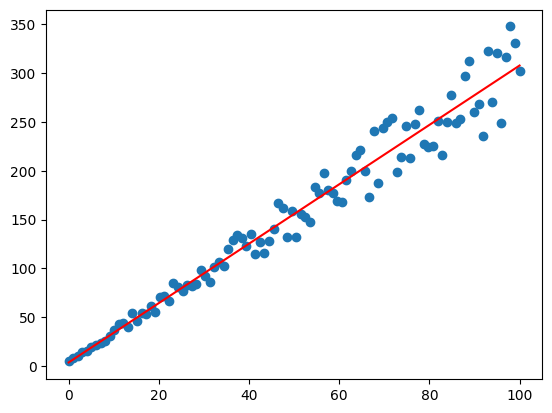

In [75]:
from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import StandardScaler
import time

scaler = StandardScaler()
xs_scaled = scaler.fit_transform(xs)

# create the function and fit it to the data
regressor = SGDRegressor()
start = time.time()
regressor.fit(xs_scaled, ys)
end = time.time()

print(f"training time: {(end-start)*1000:.4f} milliseconds")

# printing parameters
w = regressor.coef_
b = regressor.intercept_
print(f"coefficient: {w}")
print(f"intercept: {b}")

# displaying the fit result
ys_hat = w * xs_scaled + b
plt.scatter(xs, ys)
plt.plot(xs, ys_hat, c="r")

training time: 0.7460 milliseconds
coefficient: [88.69042346]
intercept: 155.69317279169053


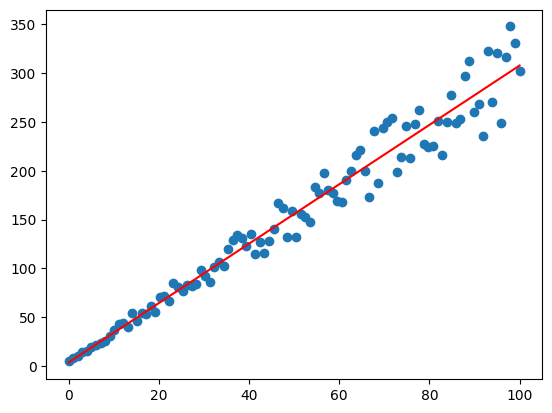

In [78]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
import time

scaler = StandardScaler()
xs_scaled = scaler.fit_transform(xs)

# create the function and fit it to the data
regressor = LinearRegression()
start = time.time()
regressor.fit(xs_scaled, ys)
end = time.time()

print(f"training time: {(end-start)*1000:.4f} milliseconds")

# printing parameters
w = regressor.coef_
b = regressor.intercept_
print(f"coefficient: {w}")
print(f"intercept: {b}")

# displaying the fit result
ys_hat = w * xs_scaled + b
plt.scatter(xs, ys)
plt.plot(xs, ys_hat, c="r")

## **Polynomial Regression**
Here I try to implement a simple 3 features polynomial regression

inputs shape: (100, 1)
outputs shape (100, 1)
inputs x features matrix shape: (100, 3)


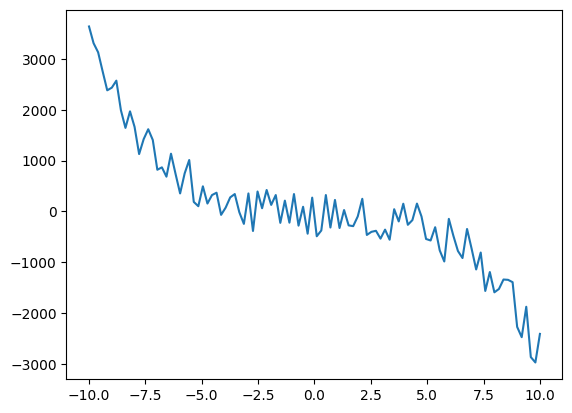

In [75]:
import matplotlib.pyplot as plt
import numpy as np

xs = np.linspace(-10,10, 100)
ys = []

for x in xs:
    epsilon = (np.random.rand() - 0.5) * 1000
    ys.append(1*x + 2*x**2 - 3*x**3 + epsilon)

# setting the ys to a numpy array too (now its a simple list of number)
xs = xs.reshape(100, 1)
ys = np.array(ys).reshape(-1,1)

xs_features = np.hstack([xs, xs**2, xs**3]).reshape(100, 3)

from sklearn.preprocessing import StandardScaler

std_scaler = StandardScaler()
xs_features = std_scaler.fit_transform(xs_features)

print("inputs shape:", xs.shape)
print("outputs shape", ys.shape)
print("inputs x features matrix shape:", xs_features.shape)
plt.plot(xs, ys)

xs_feat shape: (100, 3)
ys shape: (100, 1)
W shape: (1, 3)


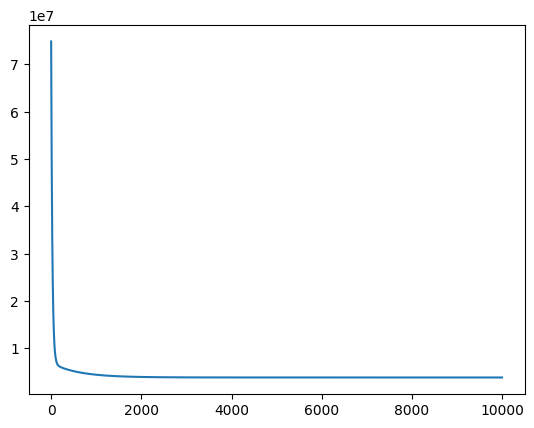

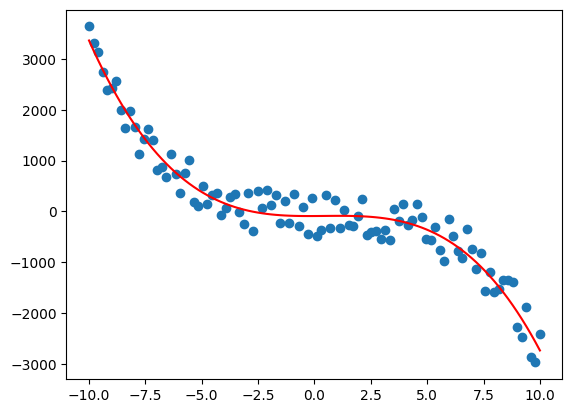

W: [[   15.2066833    123.00314773 -1198.00806928]]
b: 47.27362002754467


In [ ]:
# I want to find the parameters that best describe the curve above

# y = w1x + w2x^2 + w3x^3 + b = W*x + b
# where W = [w1, w2, w3]

# parameters initialization
W = np.array([0, 0, 0]).reshape(1,-1)
b = 0

print("xs_feat shape:", xs_features.shape)
print("ys shape:", ys.shape)
print("W shape:", W.shape)

# learning rate
alpha = 0.0001
n = len(xs[0]) # number of samples
errors = []

for _ in range(10000):
    
    error = 1 / (2*n) * np.sum((xs_features @ W.T + b - ys)**2) # computing the loss (100, 3) @ (3, 1) - (100, 1)
    errors.append(error)

    dfdW = 1/n * xs_features.T @ (xs_features @ W.T + b - ys) # (3, 100) @ [(100, 3) @ (1, 3) - (100, 1)]
    dfdb = 1/n * np.sum(xs_features @ W.T + b - ys)

    W = W - alpha * dfdW.T # (objective here is have a (1,3))
    b = b - alpha * dfdb

plt.plot(errors)
plt.show()

y_hat = xs_features @ W.T + b # (1, 3) (100, 1)  = (100, 1)

plt.scatter(xs, ys)
plt.plot(xs, y_hat, c='r')
plt.show()

print("W:", W)
print("b:", b)